
**Proyecto - Semestra IAMLDL**

---

- Por ***José Arriagada***



#1.- Líbrerias
---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, LSTM, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import drive

import time

#2.- Obteniendo el Data Set

##2.1.- De Google Drive

In [ ]:
!wget https://drive.google.com/uc?id=1jRQYH_4AR5JCKus62deW_wTFagkgmLVr -O CHESS_data_set.csv

--2023-12-25 18:36:13--  https://drive.google.com/uc?id=1jRQYH_4AR5JCKus62deW_wTFagkgmLVr
Resolving drive.google.com (drive.google.com)... 64.233.182.101, 64.233.182.102, 64.233.182.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.182.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vq1052og7ue1diahqp1kt99nr0cd3m7v/1703529375000/15846056173042354734/*/1jRQYH_4AR5JCKus62deW_wTFagkgmLVr?uuid=f1edec63-6d08-42bf-a282-3ed96f67c610 [following]
--2023-12-25 18:36:16--  https://doc-0s-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vq1052og7ue1diahqp1kt99nr0cd3m7v/1703529375000/15846056173042354734/*/1jRQYH_4AR5JCKus62deW_wTFagkgmLVr?uuid=f1edec63-6d08-42bf-a282-3ed96f67c610
Resolving doc-0s-48-docs.googleusercontent.com (doc-0s-48-docs.googleusercontent.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connecting to doc-0

## 2.2.- Del Repositorio en GitLab

In [ ]:
!wget -O data_set.csv https://gitlab.com/jose.arriagada1701/proyecto-intr_ap_de_ml_y_dl/-/raw/main/data_set.csv?ref_type=heads&inline=false

--2023-12-27 15:28:41--  https://gitlab.com/jose.arriagada1701/proyecto-intr_ap_de_ml_y_dl/-/raw/main/data_set.csv?ref_type=heads
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16588815 (16M) [text/plain]
Saving to: ‘data_set.csv’

data_set.csv        100%[===================>]  15.82M  66.8MB/s    in 0.2s    

2023-12-27 15:28:41 (66.8 MB/s) - ‘data_set.csv’ saved [16588815/16588815]



##2.3.- Cargando DataSet

In [ ]:
#Cargo el de Gitlab
data_set = pd.read_csv('data_set.csv')
t1 = len(data_set)
print(f"Tamaño Original : {t1}")

Tamaño Original : 40249


In [ ]:
# Eliminar filas con valores NaN y restablecer el índice
data_set = data_set.dropna().reset_index(drop=True)
t2 = len(data_set)
# Mostrar el tamaño después de eliminar NaN
print(f"Tamaño quitando los NAN : {t2}")

Tamaño quitando los NAN : 25587


In [ ]:
porcentaje = (t2 / t1) * 100
print(f"{porcentaje:.2f} %")

63.57 %


- **Se redujo el data set a 63.57 %**

In [ ]:
data_set # Mostando el dataset

Event           Site        Date Round               White  \
0                IBM      Amsterdam  1971/??/??     1  Gligoric, Svetozar   
1                IBM      Amsterdam  1971/??/??     2   Hartoch, Robert G   
2                IBM      Amsterdam  1971/??/??     3    Smyslov, Vassily   
3                IBM      Amsterdam  1971/??/??     4         Keres, Paul   
4                IBM      Amsterdam  1971/??/??     5    Smyslov, Vassily   
...              ...            ...         ...   ...                 ...   
25582      17th Open    Chicago USA  2008/05/26     6          Gurevich,D   
25583      17th Open    Chicago USA  2008/05/26     7       Yermolinsky,A   
25584  National Open  Las Vegas USA  2008/06/07     4         Fressinet,L   
25585  National Open  Las Vegas USA  2008/06/08     5          Gurevich,D   
25586  National Open  Las Vegas USA  2008/06/08     6          Finegold,B   

                  Black   Result  WhiteElo  BlackElo  ECO  \
0      Smyslov, Vassily      0-1    2600.0    2620.0  D07   
1      Smyslov, Vassily      0-1    2400.0    2620.0  A48   
2         Timman, Jan H      1-0    2620.0    2445.0  B08   
3      Smyslov, Vassily  1/2-1/2    2615.0    2620.0  B15   
4      Scholl, Eduard C  1/2-1/2    2620.0    2430.0  D78   
...                 ...      ...       ...       ...  ...   
25582        Shabalov,A      1-0    2513.0    2633.0  A32   
25583        Gurevich,D  1/2-1/2    2518.0    2513.0  A57   
25584        Gurevich,D  1/2-1/2    2656.0    2513.0  E10   
25585      Petrosian,TL  1/2-1/2    2513.0    2616.0  D45   
25586        Gurevich,D      1-0    2539.0    2513.0  E38   

                                                   Moves  
0      d4 d5 c4 Nc6 Nc3 dxc4 d5 Ne5 Bf4 Ng6 Bg3 e5 dx...  
1      d4 Nf6 Nf3 g6 c3 Bg7 Bf4 b6 Nbd2 Ba6 a4 c5 a5 ...  
2      Nf3 g6 d4 Bg7 e4 d6 Be2 Nf6 Nc3 O-O O-O Bg4 Bg...  
3      e4 c6 d4 d5 Nc3 dxe4 Nxe4 Nf6 Nxf6+ exf6 Bc4 Q...  
4      Nf3 g6 d4 Nf6 c4 Bg7 g3 c6 Bg2 O-O O-O d5 Nbd2...  
...                                                  ...  
25582  d4 Nf6 c4 e6 g3 c5 Nf3 cxd4 Nxd4 Bb4+ Bd2 Be7 ...  
25583  d4 Nf6 c4 c5 d5 b5 cxb5 a6 b6 d6 Nc3 Nbd7 a4 Q...  
25584  d4 Nf6 Nf3 e6 c4 a6 Nc3 c5 d5 b5 Bg5 b4 Ne4 Be...  
25585  d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 e3 Nbd7 Bd2 Bd6 Bd3...  
25586  d4 Nf6 c4 e6 Nc3 Bb4 Qc2 c5 dxc5 Bxc5 Nf3 Qb6 ...  

[25587 rows x 11 columns]

- **¿Qué significa cada columna?**

  - **Event**: Quien organiza el evento o el nombre de esté.

  - **Site**: El lugar del evento.

  - **Date**: La fecha

  - **White**: Quién jugo con las blancas.

  - **Black**: Quién jugo con las negras.

  - **Result**: Si ganaron las blancas, las negras o fue tablas.

  - **WhiteElo**: La puntuación del jugador según la FIDE (Federación Internacional de ajedrez).

  - **BlackElo**: Puntuación Negras según la FIDE.

  - **ECO**: Clasificación de la apertura

  - **Move**: Movimeintos de la partida.


#3.- Entendiendo la Data y Preparandola

#3.1.- Entendiendo la variable Result

**¿Qué valores tiene la columna result?**

- **Valores de Result**
  - **0-1**: Ganaron las blancas.
  - **0-1**: Ganaron las negras.
  -**1/2-1/2**: Tablas.

**Cantidad para cada resultado**

In [ ]:
# Crear una tabla de correspondencia
tabla_valores = {
    '1-0': 'Ganaron las blancas.',
    '0-1': 'Ganaron las negras.',
    '1/2-1/2': 'Tablas.',
    '*': 'Resultado no definido.'
}

# Obtener la cuenta de los valores en la columna 'Result'
valores = data_set['Result'].value_counts()

# Imprimir la tabla de interpretación
for valor, interpretacion in tabla_valores.items():
    if valor in valores.index:
        print(f"{valor}: {interpretacion} ({valores[valor]} veces)")
    else:
        print(f"{valor}: {interpretacion} (0 veces)")


1-0: Ganaron las blancas. (8430 veces)
0-1: Ganaron las negras. (5726 veces)
1/2-1/2: Tablas. (11425 veces)
*: Resultado no definido. (6 veces)


**Quitando datos nulos**

In [ ]:
data_set = data_set[data_set['Result'] != '*']
valores = data_set['Result'].value_counts()
print(valores)

1/2-1/2    11425
1-0         8430
0-1         5726
Name: Result, dtype: int64


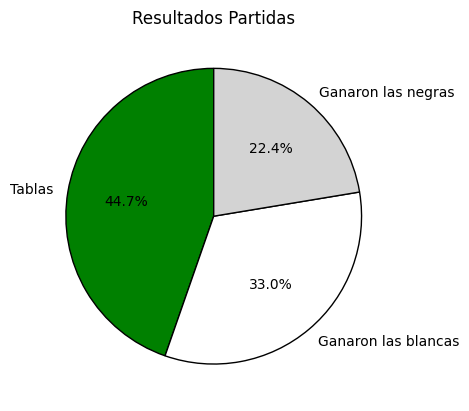

In [ ]:
# Crear una tabla de correspondencia
tabla_valores = {
    '1-0': 'Ganaron las blancas.',
    '0-1': 'Ganaron las negras.',
    '1/2-1/2': 'Tablas.',
}

# Obtener la cuenta de los valores en la columna 'Result'
valores = data_set['Result'].value_counts()

# Preparar datos para el gráfico de torta
resultados = ["Tablas", "Ganaron las blancas", "Ganaron las negras"]
conteo = list(valores.values)


# Colores personalizados (gris claro, blanco, negro)
colores = ['green', 'white', '#D3D3D3']

# Crear el gráfico de torta con borde
plt.pie(conteo, labels=resultados, autopct='%1.1f%%', colors=colores, startangle=90, wedgeprops=dict(edgecolor='black'))

# Añadir título
plt.title('Resultados Partidas')

# Mostrar el gráfico
plt.show()

#3.2 Estadisticas de jugadores

**Blancas**

Los que más ganarón

In [ ]:
white_wins = data_set[(data_set['Result'] == '1-0')]
white_wins = data_set[(data_set['Result'] == '1-0')]
white_wins = white_wins['White']
white_wins.value_counts().head(10)

Vaganian, Rafael A     357
Sokolov, Ivan          282
Yudasin, Leonid        245
Georgiev, Kiril        229
Gurevich, Dmitry       212
Movsesian,S            203
Sasikiran,K            195
Milov,V                188
Quinteros, Miguel A    183
Shabalov,A             177
Name: White, dtype: int64

In [ ]:
white_wins = data_set[(data_set['Result'] == '0-1')]
white_wins = white_wins['White']
white_wins.value_counts().head(10)

Vaganian, Rafael A     121
Gurevich, Dmitry       103
Sokolov, Ivan           90
Gligoric, Svetozar      85
Quinteros, Miguel A     83
Ivanov, Igor V          73
Shabalov, Alexander     71
Yudasin, Leonid         70
Stefanova,A             67
Georgiev, Kiril         66
Name: White, dtype: int64

**Negras**

In [ ]:
black = data_set[(data_set['Result'] == '1-0')]
black = data_set[(data_set['Result'] == '1-0')]
black = black['Black']
black.value_counts().head(10)

Vaganian, Rafael A     175
Gurevich, Dmitry       163
Sokolov, Ivan          143
Quinteros, Miguel A    139
Gligoric, Svetozar     118
Polgar, Zsuzsa         114
Georgiev, Kiril        112
Paehtz,E               112
Smyslov, Vassily       109
Yudasin, Leonid        101
Name: Black, dtype: int64

In [ ]:
black = data_set[(data_set['Result'] == '0-1')]
black = black['Black']
black.value_counts().head(10)

Vaganian, Rafael A     258
Sokolov, Ivan          190
Sasikiran,K            149
Shabalov,A             148
Nakamura,H             147
Yudasin, Leonid        146
Gurevich, Dmitry       143
Shabalov, Alexander    143
Quinteros, Miguel A    142
Georgiev, Kiril        141
Name: Black, dtype: int64

## Entendiendo variable Move

In [ ]:
# Calcula la longitud del movimiento más corto
min_length = data_set['Moves'].apply(len).min()

# Calcula la longitud del movimiento más largo
max_length = data_set['Moves'].apply(len).max()

# Imprime los resultados
print("Longitud del movimiento más corto:", min_length)
print("Longitud del movimiento más largo:", max_length)

Longitud del movimiento más corto: 2
Longitud del movimiento más largo: 1498


#4.- Entrenando el Modelo

##Modelo 1

In [ ]:
# Preprocesar los datos
moves = data_set['Moves'].values
results = data_set['Result'].values

# Codificar las etiquetas 'Result' a valores numéricos
label_encoder = LabelEncoder()
results_encoded = label_encoder.fit_transform(results)

# Tokenizar y convertir las secuencias de texto a secuencias de enteros
tokenizer = Tokenizer()
tokenizer.fit_on_texts(moves)
sequences = tokenizer.texts_to_sequences(moves)

# Pad secuencias para que tengan la misma longitud (ajustado al tamaño máximo)
max_sequence_length = 1498  # Tamaño máximo de la secuencia
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, results_encoded, test_size=0.2, random_state=42)

# Construir el modelo
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy on test set: {accuracy}')

# Hacer predicciones en nuevos datos (puedes ajustar esto según tus necesidades)
new_moves = ["e4 e5 Nf3 Nf6 d4 exd4 e5 Ne4 Qxd4 d5 exd6 Nxd6 Bd3 Nc6 Qf4 Be7 O-O O-O Nc3 Be6 Be3 Qd7 Rad1 Rad8 Ng5 Bxg5 Qxg5 f6 Qh4 Bf5 Bc5 Bxd3 Rxd3 Qe6 Nd5 Rf7 Rfd1 Rfd7 Nxc7 Rxc7 Bxd6 Rcd7 Qg3 Qxa2 h4 Qe6 h5 h6 b3 Ne5 Bxe5 Rxd3 Rxd3 Rxd3 Qxd3 fxe5 Qd8+ Kh7 Qd3+ Kh8 Qd8+"]
new_sequences = tokenizer.texts_to_sequences(new_moves)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)

# Realizar predicciones
predictions = model.predict(new_padded_sequences)
predicted_results = label_encoder.inverse_transform(np.round(predictions).astype(int))

# Imprimir las predicciones
print("Predicted Results:", predicted_results)


Epoch 1/3
256/256 [==============================] - 25s 89ms/step - loss: -28.3757 - accuracy: 0.2200 - val_loss: -46.2495 - val_accuracy: 0.2257
Epoch 2/3
256/256 [==============================] - 20s 76ms/step - loss: -62.8493 - accuracy: 0.2202 - val_loss: -78.8212 - val_accuracy: 0.2257
Epoch 3/3
160/160 [==============================] - 4s 24ms/step - loss: -109.1677 - accuracy: 0.2337
Accuracy on test set: 0.23368503153324127
1/1 [==============================] - 0s 374ms/step
Predicted Results: ['0-1']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Preprocesar los datos
moves = data_set['Moves'].values
results = data_set['Result'].values

# Codificar las etiquetas 'Result' a valores numéricos
label_encoder = LabelEncoder()
results_encoded = label_encoder.fit_transform(results)

# Obtener valores únicos en 'Result'
unique_results = set(results)

# Imprimir la correspondencia sin repeticiones
print("Correspondencia entre valores originales y codificados:")
for original_value in unique_results:
    # Encontrar el valor codificado correspondiente
    encoded_value = label_encoder.transform([original_value])[0]
    print(f"Valor {encoded_value} corresponde a: {original_value}")


Correspondencia entre valores originales y codificados:
Valor 1 corresponde a: 1-0
Valor 0 corresponde a: 0-1
Valor 2 corresponde a: 1/2-1/2


In [ ]:


drive.mount('/content/drive')

model.save('/content/drive/MyDrive/modelo1.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Modelo 2

In [ ]:

# Supongamos que ya tienes tus datos preprocesados
moves = data_set['Moves'].values
results = data_set['Result'].values

# Codificar las etiquetas 'Result' a valores numéricos
label_encoder = LabelEncoder()
results_encoded = label_encoder.fit_transform(results)

# Tokenizar y convertir las secuencias de texto a secuencias de enteros
tokenizer = Tokenizer()
tokenizer.fit_on_texts(moves)
sequences = tokenizer.texts_to_sequences(moves)

# Pad secuencias para que tengan la misma longitud (ajustado al tamaño máximo)
max_sequence_length = 1498
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, results_encoded, test_size=0.2, random_state=42)

# Tamaño del vocabulario
vocab_size = len(tokenizer.word_index) + 1

# Dimensión de la incrustación
embedding_dim = 50

# Entrada para las secuencias de texto
input_text = Input(shape=(max_sequence_length,))

# Capa de incrustación
embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length)(input_text)

# Capa de aplanamiento
flatten = Flatten()(embedding)

# Capa densa para la clasificación
dense1 = Dense(16, activation='relu')(flatten)

# Salida
output = Dense(1, activation='sigmoid')(dense1)

# Modelo completo
model = Model(inputs=input_text, outputs=output)

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, y_pred_binary)

print(f'Accuracy: {accuracy * 100:.2f}%')


Epoch 1/30
512/512 [==============================] - 16s 30ms/step - loss: -306372.3438 - accuracy: 0.2202 - val_loss: -1207314.5000 - val_accuracy: 0.2257
Epoch 2/30
512/512 [==============================] - 6s 13ms/step - loss: -4332852.5000 - accuracy: 0.2202 - val_loss: -8913776.0000 - val_accuracy: 0.2257
Epoch 3/30
512/512 [==============================] - 9s 17ms/step - loss: -17181778.0000 - accuracy: 0.2202 - val_loss: -27315172.0000 - val_accuracy: 0.2257
Epoch 4/30
512/512 [==============================] - 4s 8ms/step - loss: -42141816.0000 - accuracy: 0.2202 - val_loss: -58850212.0000 - val_accuracy: 0.2257
Epoch 5/30
512/512 [==============================] - 3s 5ms/step - loss: -81163680.0000 - accuracy: 0.2202 - val_loss: -105076368.0000 - val_accuracy: 0.2257
Epoch 6/30
512/512 [==============================] - 4s 7ms/step - loss: -135700160.0000 - accuracy: 0.2202 - val_loss: -167379728.0000 - val_accuracy: 0.2257
Epoch 7/30
512/512 [==============================

In [ ]:
# Obtener la hora actual
current_time = time.strftime("%H%M%S")

# Montar Google Drive
drive.mount('/content/drive')

# Guardar el modelo con la hora actual concatenada al nombre de archivo
model.save(f'/content/drive/MyDrive/modelo2-30epochs_{current_time}.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Modelo 3

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Preprocesar datos (igual que en tu ejemplo)
moves = data_set['Moves'].values
results = data_set['Result'].values

label_encoder = LabelEncoder()
results_encoded = label_encoder.fit_transform(results)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(moves)
sequences = tokenizer.texts_to_sequences(moves)
max_sequence_length = 1498
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, results_encoded, test_size=0.2, random_state=42)

# Construir el modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_sequence_length))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
accuracy_lstm = model_lstm.evaluate(X_test, y_test)[1]
print(f'Accuracy on test set (LSTM): {accuracy_lstm}')


Epoch 1/5
256/256 [==============================] - 37s 113ms/step - loss: -30.3187 - accuracy: 0.2197 - val_loss: -48.5997 - val_accuracy: 0.2257
Epoch 2/5
256/256 [==============================] - 19s 76ms/step - loss: -65.1909 - accuracy: 0.2202 - val_loss: -80.8957 - val_accuracy: 0.2257
Epoch 3/5
256/256 [==============================] - 17s 65ms/step - loss: -97.3981 - accuracy: 0.2202 - val_loss: -112.6502 - val_accuracy: 0.2257
Epoch 4/5
256/256 [==============================] - 19s 74ms/step - loss: -129.2184 - accuracy: 0.2202 - val_loss: -144.1511 - val_accuracy: 0.2257
Epoch 5/5
160/160 [==============================] - 4s 24ms/step - loss: -172.5830 - accuracy: 0.2337
Accuracy on test set (LSTM): 0.23368503153324127


In [ ]:
from google.colab import drive
from tensorflow.keras.models import load_model
drive.mount('/content/drive')

model_lstm.save('/content/drive/MyDrive/modelo3.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Modelo 4

In [ ]:
from keras.layers import Input, Embedding, Flatten, Dense, LSTM, Bidirectional, Dropout
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Supongamos que ya tienes tus datos preprocesados
moves = data_set['Moves'].values
results = data_set['Result'].values

# Codificar las etiquetas 'Result' a valores numéricos
label_encoder = LabelEncoder()
results_encoded = label_encoder.fit_transform(results)

# Tokenizar y convertir las secuencias de texto a secuencias de enteros
tokenizer = Tokenizer()
tokenizer.fit_on_texts(moves)
sequences = tokenizer.texts_to_sequences(moves)

# Pad secuencias para que tengan la misma longitud (ajustado al tamaño máximo)
max_sequence_length = 1498
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, results_encoded, test_size=0.2, random_state=42)

# Tamaño del vocabulario
vocab_size = len(tokenizer.word_index) + 1

# Dimensión de la incrustación
embedding_dim = 50

# Entrada para las secuencias de texto
input_text = Input(shape=(max_sequence_length,))

# Capa de incrustación
embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length)(input_text)

# Capa bidireccional LSTM
lstm = Bidirectional(LSTM(64, return_sequences=True))(embedding)

# Capa de aplanamiento
flatten = Flatten()(lstm)

# Capa densa
dense1 = Dense(128, activation='relu')(flatten)
dropout1 = Dropout(0.5)(dense1)

# Otra capa densa
dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(dense2)

# Capa de salida
output = Dense(1, activation='sigmoid')(dropout2)

# Modelo completo
model = Model(inputs=input_text, outputs=output)

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Imprimir resumen del modelo
model.summary()

# Entrenar el modelo
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, y_pred_binary)

print(f'Accuracy: {accuracy * 100:.2f}%')


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1498)]            0         
                                                                 
 embedding_2 (Embedding)     (None, 1498, 50)          131950    
                                                                 
 bidirectional (Bidirection  (None, 1498, 128)         58880     
 al)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 191744)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               24543360  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                           

In [ ]:
# Obtener la hora actual
current_time = time.strftime("%H%M%S")

# Montar Google Drive
drive.mount('/content/drive')

# Guardar el modelo con la hora actual concatenada al nombre de archivo
model.save(f'/content/drive/MyDrive/modelo4-30epochs_{current_time}.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
